In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



In [98]:
sns.set_context("paper",font_scale=1.7)
sns.color_palette(palette=sns.diverging_palette(260, 133, l=60, center="dark") )
sns.set_style(style ='dark')

In [2]:
file = pd.read_csv('DSI_kickstarterscrape_dataset.csv')

In [3]:
file.shape

(45957, 17)

# Part 1: Foundational Data Analysis

### 1- What is the mean (total) pledge that projects get? (not per backer) *

In [5]:
file.pledged.mean()


4980.749678963979

### 2- Create a histogram that shows the distribution for number of backers. What is the skew of the distribution? 

In [66]:
file.backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

Text(0.5,1,'Backers Distribution')

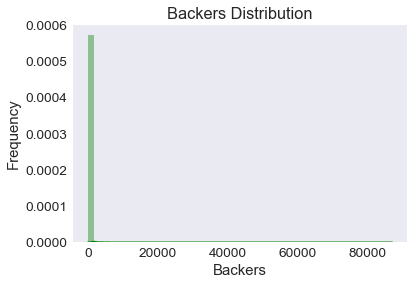

In [57]:
sns.distplot(file.backers , color="g")
plt.xlabel('Backers' )
plt.ylabel('Frequency')
plt.title('Backers Distribution')


Right skewed distribution

### 3- Is the ‘duration’ variable normally distributed? *


Text(0.5,1,'Duration Distribution')

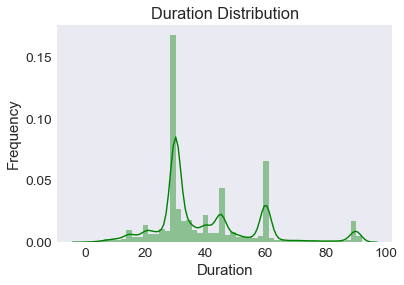

In [63]:
sns.distplot(file.duration , kde = True, color="g")
plt.xlabel('Duration' )
plt.ylabel('Frequency')
plt.title('Duration Distribution')

In [59]:
from scipy import stats
s , p = stats.normaltest(file.duration)

alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0
The null hypothesis can be rejected


In [60]:
file.duration.mean()

39.995546924297706

In [61]:
file.duration.mode()

0    30.0
dtype: float64

In [62]:
file.duration.median()

32.0

The mean, mode and median are all not equal. So, ‘duration’ variable is **not normally** distributed.

### 4 If you could collect data on another attribute of these projects, what would it be and why?

we can add information like:
* Number of project creators.
* Number of projects that Creator has Created.
* Is there a video for the project.
* Is their pictures for the project.

________
_______


# Part 2:

In [64]:
file.describe()

,project id,goal,pledged,funded_percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [65]:
successful_projects = file.loc[ (file.status== 'successful'), :]
failed_projects = file.loc[ (file.status== 'failed'), :]

### 1 What's the best length of time to run a campaign

Text(0.5,1,'Duration for each Project Statue')

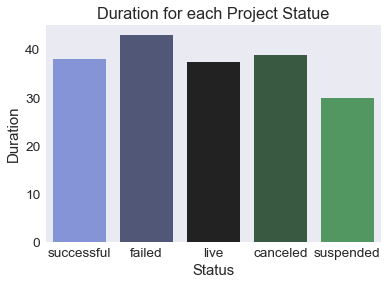

In [71]:
sns.barplot(x='status', y='duration', data=file , palette=sns.diverging_palette(260, 133, l=60, n=5, center="dark") ,ci=None )
plt.xlabel('Status' )
plt.ylabel('Duration')
plt.title('Duration for each Project Statue')


In general, there is no specific length of time for running a campaign successfully.

Text(0.5,1,'Backers by Duration in Successful Projects')

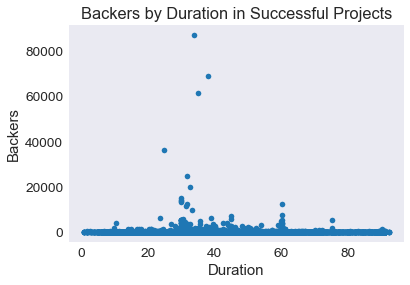

In [72]:
plt.plot( successful_projects.duration, successful_projects.backers , 'o' , )
plt.xlabel('Duration')
plt.ylabel('Backers')

plt.title('Backers by Duration in Successful Projects')


Text(0.5,1,'Funded percentage by Duration in Successful Projects')

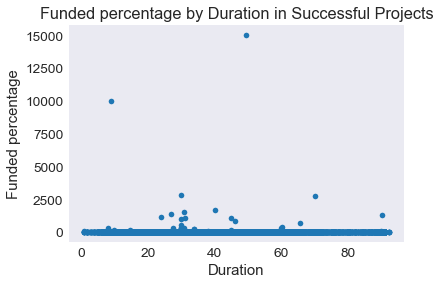

In [73]:
plt.plot( successful_projects.duration, successful_projects.funded_percentage , 'o')
plt.xlabel('Duration')
plt.ylabel('Funded percentage')

plt.title('Funded percentage by Duration in Successful Projects')

Text(0.5,1,'Levels by Duration in Successful Projects')

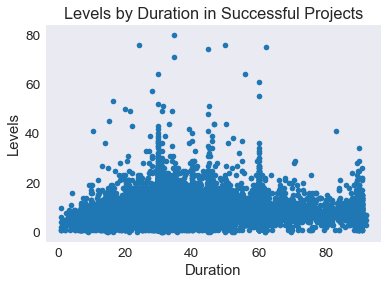

In [74]:
plt.plot( successful_projects.duration, successful_projects.levels , 'o')
plt.xlabel('Duration')
plt.ylabel('Levels')
plt.title('Levels by Duration in Successful Projects')

Text(0.5,1,'Comments by Duration in Successful Projects')

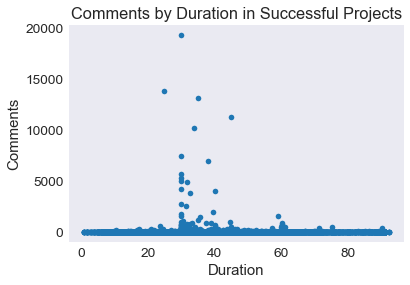

In [75]:
plt.plot( successful_projects.duration, successful_projects.comments , 'o')
plt.xlabel('Duration')
plt.ylabel('Comments')
plt.title('Comments by Duration in Successful Projects')

Text(0.5,1,'Pledged by Duration in Successful Projects')

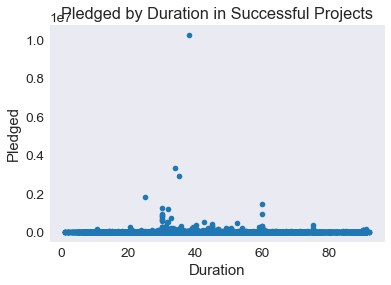

In [76]:
plt.plot( successful_projects.duration, successful_projects.pledged , 'o')
plt.xlabel('Duration')
plt.ylabel('Pledged')
plt.title('Pledged by Duration in Successful Projects')

The highest number of Backers, Funded percentage and Pledge in (20,40) interval for successful projects.

### 2 What's the ideal pledge goal

[[<matplotlib.axis.YTick at 0x124738278>,

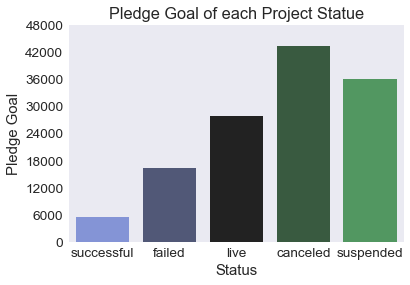

In [78]:
a = sns.barplot(x='status', y='goal', data=file , palette=sns.diverging_palette(260, 133, l=60, n=5, center="dark"),ci=None )
plt.xlabel('Status')
plt.ylabel('Pledge Goal')
plt.title('Pledge Goal of each Project Statue')
a.set( yticks = np.arange(0,50000,6000))

The ideal pledge goal for successful projects is less than 6000.

### 3  What type of projects would be most successful at getting funded?


Text(0.5,1,'Count of Successes for each category')

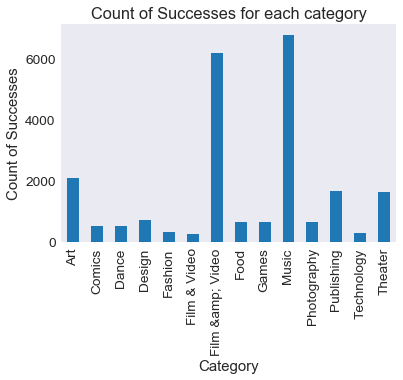

In [79]:
file[file.status == 'successful'].groupby('category').category.count().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count of Successes')
plt.title('Count of Successes for each category')

The most successful categories are: Music, Film &amp video and Art.

Text(0.5,1,'Funded Percentage for successful Categories.')

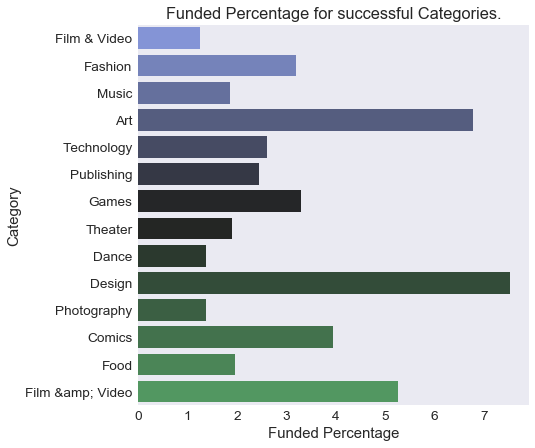

In [80]:
plt.subplots(figsize=(7,7))
sns.barplot(x='funded_percentage', y='category', data=successful_projects , palette=sns.diverging_palette(260, 133, l=60, n=14, center="dark"),ci=None )
plt.ylabel('Category')
plt.xlabel('Funded Percentage')
plt.title('Funded Percentage for successful Categories.')

The highest Funded Percentage categories are Disagin, Art and Film &amp video.


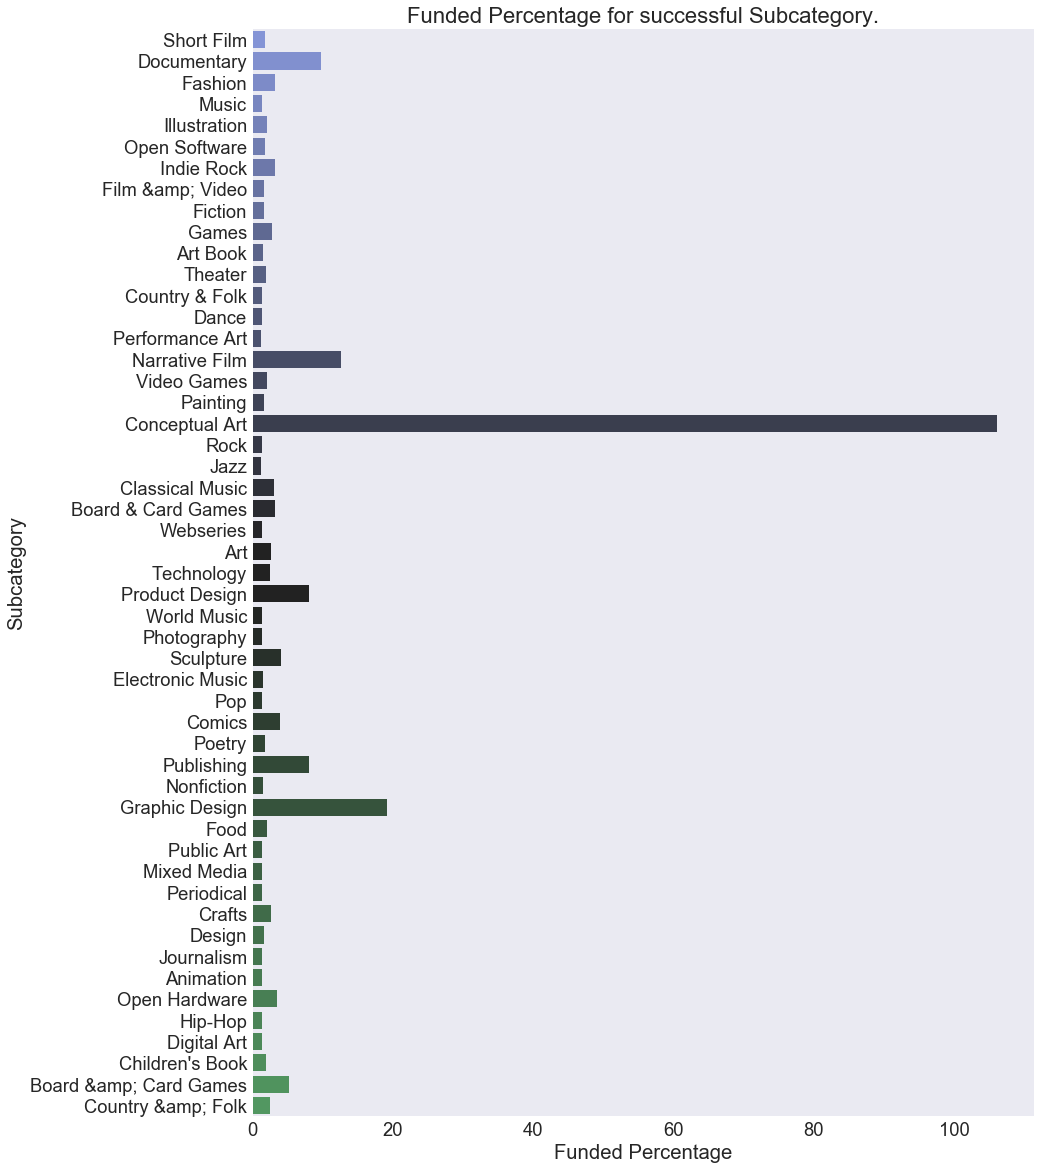

In [114]:
plt.subplots(figsize=(14,20))
sns.barplot(x='funded_percentage', y='subcategory', data=successful_projects,
            palette=sns.diverging_palette(260, 133, l=60,n=51, center="dark"),
            ci=None )

plt.ylabel('Subcategory')
plt.xlabel('Funded Percentage')
plt.title('Funded Percentage for successful Subcategory')

sns.set_context("paper",font_scale=2.4)

### 4   Is there an ideal month/day/time to launch a campaign?

In [86]:
file['year'] = [int(year[12:16]) for year in file.funded_date ]
file['month'] = [month[8:11] for month in file.funded_date ]
file['day'] = [day[0:3] for day in file.funded_date ]
file['time'] = [int(time[17:19]) for time in file.funded_date ]

In [87]:
dic_months = {'month':sorted(file.month.unique()),
              'successful':(file[(file.status == 'successful')]).groupby('month').month.count(),
              'failed':(file[(file.status == 'failed')]).groupby('month').month.count(),
              'live':(file[(file.status == 'live')]).groupby('month').month.count(),
              'canceled':(file[(file.status == 'canceled')]).groupby('month').month.count(),
              'suspended':(file[(file.status == 'suspended')]).groupby('month').month.count()              
             }
df_months = pd.DataFrame (dic_months)

In [88]:
months = pd.melt(df_months, id_vars="month", var_name="status", value_name="count")

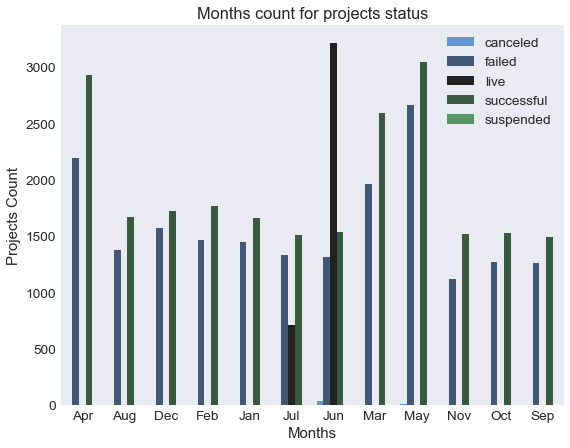

In [89]:
plt.subplots(figsize=(9,7))
sns.barplot(x='month', y='count', data=months , hue='status',palette=sns.diverging_palette(250, 133, l=60, n=5, center="dark"))

plt.ylabel('Projects Count')
plt.xlabel('Months')
plt.title('Months count for projects status')

plt.legend(loc='upper right')

In [91]:
dic_days = {'Days':sorted(file.day.unique()),
              'successful':(file[(file.status == 'successful')]).groupby('day').day.count(),
              'failed':(file[(file.status == 'failed')]).groupby('day').day.count(),
              'live':(file[(file.status == 'live')]).groupby('day').day.count(),
              'canceled':(file[(file.status == 'canceled')]).groupby('day').day.count(),
              'suspended':(file[(file.status == 'suspended')]).groupby('day').day.count()
             }
df_days = pd.DataFrame (dic_days)

In [92]:
days = pd.melt(df_days, id_vars="Days", var_name="Status", value_name="Count")

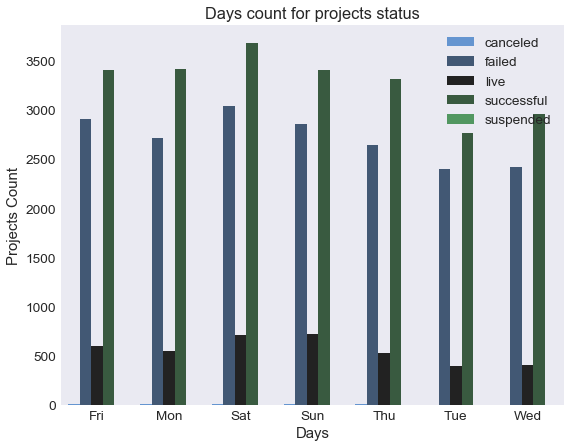

In [93]:
plt.subplots(figsize=(9,7))
sns.barplot(x='Days', y='Count', data=days , hue='Status',palette=sns.diverging_palette(250, 133, l=60, n=5, center="dark"))

plt.ylabel('Projects Count')
plt.xlabel('Days')
plt.title('Days count for projects status')
plt.legend(loc='upper right')

There is no specific good time to launch a successful campaign.

Text(0.5,1,'Time (Hours) count for projects status')

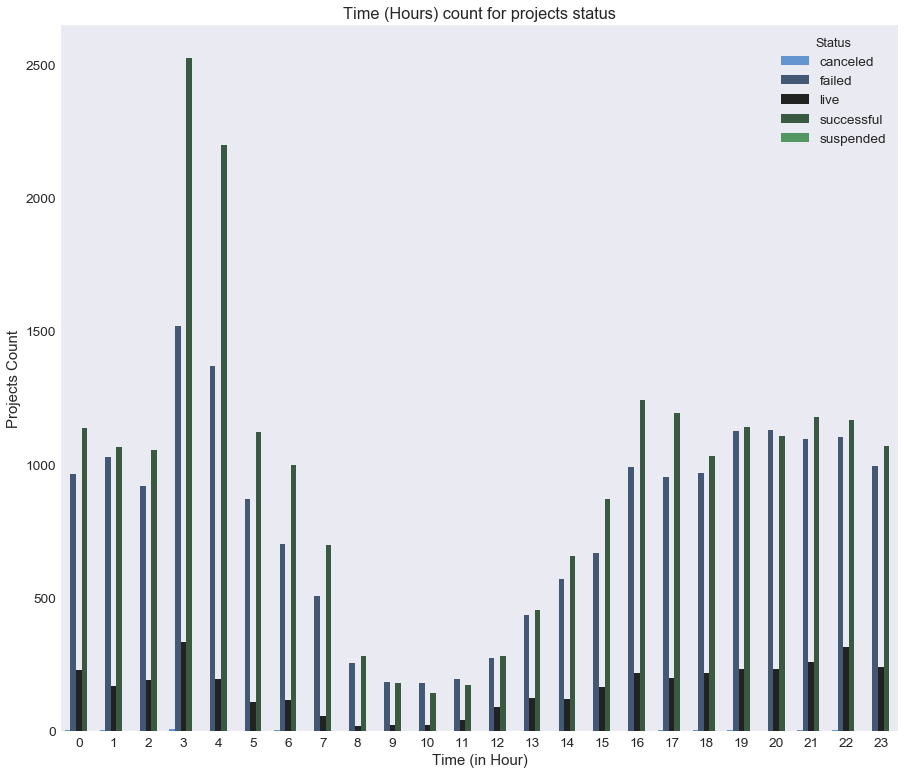

In [96]:
dic_time = {'time':sorted(file.time.unique()),
              'successful':(file[(file.status == 'successful')]).groupby('time').time.count(),
              'failed':(file[(file.status == 'failed')]).groupby('time').time.count(),
              'live':(file[(file.status == 'live')]).groupby('time').time.count(),
              'canceled':(file[(file.status == 'canceled')]).groupby('time').time.count(),
              'suspended':(file[(file.status == 'suspended')]).groupby('time').time.count()
             }
df_time = pd.DataFrame (dic_time)

times = pd.melt(df_time, id_vars="time", var_name="Status", value_name="Count")

plt.subplots(figsize=(15,13))
sns.barplot(x='time', y='Count', data=times , hue='Status',palette=sns.diverging_palette(250, 133, l=60, n=5, center="dark"))

plt.ylabel('Projects Count')
plt.xlabel('Time (in Hour)')
plt.title('Time (Hours) count for projects status')